In [23]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 26 14:44:47 2019

Features Analysis & Feature Selection

@author: caspia
"""

import os
import scipy.io as sio
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

matDir = '/Users/caspia/Desktop/Github/FBA_code_2019/src/prediction_models/experiments/pitched_instrument_regression/dataPyin/'
os.chdir(matDir)

FeatureList = {'middleAlto Saxophone5_std_': np.arange(68), \
               'middleAlto Saxophone5_nonscore_': np.arange(24), \
               'middleAlto Saxophone5_score revDTW_0322fullset_': np.arange(26), \
               'middleAlto Saxophone5_score revDTW_fullset0219_': np.arange(26, 33), \
               'middleAlto Saxophone5_score revDTW_fullset0220_': np.arange(26, 32), \
               'middleAlto Saxophone5_score revDTW_noteratio0220mix_': np.arange(32, 36) \
               }
'''
FeatureList = {'middleAlto Saxophone2_std_': np.arange(68), \
               'middleAlto Saxophone2_nonscore_': np.arange(24), \
               'middleAlto Saxophone2_score revDTW_0322fullset_': np.arange(43)
               }'''
FeatureNum = 68+24+22+4+7+6+4
DataSize = {2013: 120, 2014: 149, 2015: 122}
# Npitch 1
# Spitch 1
# Spitch 2
# Ndynamic 1
# Ndynamic 2
# NIOI
# SIOI
# Sdtw
# Sjump
## Snlr3
# Snlr4
subIndex = np.array([69,70,71,72, \
                     93,94,95,96, \
                     97,98,99,100, \
                     77,78,79,80, \
                     81,82,83,84, \
                     86,87,88,89,90,91, \
                     107,108,109,110,111,112, \
                     105,106, \
                     114,115,116,117, \
                     #125,126,127,128,129,130, \
                     133,134])

def combineAllFeatures():
    AllFeatures = np.empty(shape = [0, FeatureNum])
    AllLabels = np.empty(shape = [0, 4])
    AllIds = np.empty(shape = [0, 1])
    for year in np.arange(2013, 2016):
        featureYear = np.empty(shape = [DataSize[year], 0])
        for file in FeatureList:
            filename = file + str(year)
            matFile = sio.loadmat(filename)
            featureYear = np.concatenate((featureYear,matFile['features'][:, FeatureList[file]]), axis = 1)
            labelYear = matFile['labels']
            idsYear = matFile['student_ids']
        AllFeatures = np.concatenate((AllFeatures, featureYear), axis = 0)
        AllLabels = np.concatenate((AllLabels, labelYear), axis = 0)
        AllIds = np.concatenate((AllIds, idsYear), axis = 0)
    return AllFeatures, AllLabels, AllIds
            
def runPCA(features):
    plt.figure()
    features = StandardScaler().fit_transform(features)
    pca = PCA()
    pca.fit(features)
    v_ratio = pca.explained_variance_ratio_
    y_pos = np.arange(len(v_ratio))
    plt.bar(y_pos, v_ratio, align='center', alpha=0.5)
    plt.title('Explained Variance (Ratio) - Sight-reading Exercise')
    plt.show()
    
    plt.figure(figsize=(2000,2000))
    mtx = np.cov(features.T)
    mtx[mtx>1] = 1
    mtx = np.abs(mtx)
    plt.matshow(mtx)
    ax = plt.gca()
    ax.set_xticklabels(np.arange(1, 41))
    plt.title('Covariance Matrix - Sight-reading Exercise',y=1.15)
    plt.colorbar()
    plt.figure()
    
    principalComponents = pca.fit_transform(features)
    trans = pca.components_.T
    plt.matshow(np.abs(pca.components_[0:4, :]),cmap='viridis')
    plt.yticks([0,1,2,3],['1st Comp','2nd Comp','3rd Comp', '4th Comp'],fontsize=10)
    plt.colorbar()
    plt.clim(0, 0.4)
    plt.title('Principal Components Composition - Sight-reading Exercise', y=1.25)
    plt.show()
    
    
    # 0: 118:end
    # 1: 124:end
    # 2: 116:end
    st = np.array([118, 124, 116, 130, 131]) # sight-reading
    #st = np.array([117,117,123,128,128]) # technical
    i_group = []
    
    for i in np.arange(0):
        print(i)
        B = np.sort(np.abs(trans[:, i]))
        I = np.argsort(np.abs(trans[:, i]))
        i_group.append(I[st[i]:])
        plt.plot(B, '*')
        #plt.plot([st[i], st[i]], [0, 0.20], '-')
        plt.show()
        #plt.matshow(mtx[st[i]:,st[i]:])
        #plt.colorbar()
        #plt.show()
    
    
    return v_ratio, trans, mtx

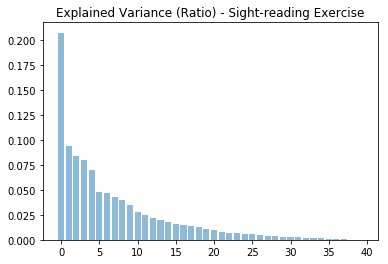

<Figure size 144000x144000 with 0 Axes>

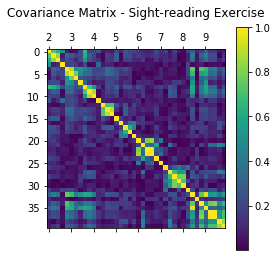

<Figure size 432x288 with 0 Axes>

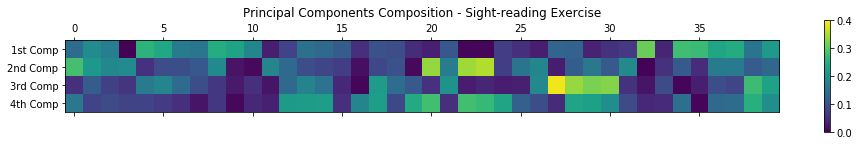

In [24]:
features, labels, student_ids = combineAllFeatures()
features = features[:, subIndex]
v_ratio, trans, mtx = runPCA(features)        